<a href="https://colab.research.google.com/github/c-e-leiva/AprendizajeAutomatico2/blob/main/MLP_KAN_TP2_LEIVA_CARLOS_EZEQUIEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TP2 - Aprendizaje Automático 2 - MLP vs KAN**
## **Tema:** Comparación entre MLP (Perceptrón Multicapa) y KAN (Kolmogorov-Arnold Networks) en problemas de regresión
## **Alumno:** Carlos Ezequiel Leiva
## **Profesora:** Ana Diedrichs

____________________________
# **CONSIGNAS DEL TRABAJO:**
____________________________

* Utilice este notebook como su diario de aprendizaje en esta materia.
* Mencione las herramientas utilizadas.
* Describa sus dificultades y como pudo sortearlas.
* Grafique las curvas de entrenamiento y testeo para cada configuración probada en sus modelos.


## **Objetivos:**  
1. Generar un conjunto de datos sintéticos para un problema de regresión.  
2. Implementar y evaluar una **MLP de una capa oculta** en diferentes configuraciones.  
3. Implementar y evaluar una **red KAN** en diferentes configuraciones.  
4. Analizar los casos de **underfitting**, **sobreajuste (overfitting)** y una **solución aceptable** en ambos modelos.  


___________________
# **INTRODUCCIÓN**
___________________

En este trabajo práctico se comparan dos arquitecturas de redes neuronales aplicadas a un problema de regresión con datos sintéticos: **MLP (Multi-Layer Perceptron)** y **KAN (Kolmogorov-Arnold Network)**.

El objetivo es analizar el rendimiento de ambos modelos, observando fenómenos como **underfitting**, **overfitting** y **ajuste adecuado**, tanto a nivel numérico como visual. Se busca comprender cómo cada red aprende y generaliza, y cómo influye la complejidad del modelo en la capacidad de predicción.

### **Herramientas utilizadas**

- **Python** como entorno principal de desarrollo.
- **NumPy**, **Matplotlib** y **scikit-learn** para generación de datos, visualización y métricas.
- **TensorFlow** para implementar el modelo **MLP**.
- Implementación experimental en **Python** para el modelo **KAN**.

### **Modelos evaluados**

- **MLP:** Red neuronal clásica con capas densas y funciones de activación no lineales, ampliamente utilizada en tareas de regresión y clasificación.

- **KAN:** Arquitectura basada en el teorema de Kolmogorov-Arnold, diseñada para representar funciones multivariables como combinaciones de funciones univariables.



______________________________________
# **INSTRUCCIONES DETALLADAS:**  
______________________________________

## **1- Generación de Datos**  
- Crear una función que generer un dataset sintético con:  
  - Al menos **4 features numéricas** (generadas aleatoriamente, con distribuciones variadas: normales, uniformes, etc.).  
  - **1 target continuo** (generado mediante una combinación **no** lineal de las features + ruido gaussiano).  
  - Ejemplo:  
    ```python
    import numpy as np
    np.random.seed(42)
    X = np.random.randn(1000, 4)  # 1000 muestras, 4 features
    y = 2 * X[:, 0] + np.sin(X[:, 1]) + X[:, 2] * X[:, 3] + 0.1 * np.random.randn(1000)
    ```  
  - **Dividir los datos** en entrenamiento (70%) y test (30%).  


### **2- Entrenamiento de una MLP (1 capa oculta)**  
Usar`PyTorch`/`TensorFlow` para implementar una MLP con:  
- **Función de activación ReLU** (u otra no lineal).  
- **Optimizador:** Adam o SGD.  
- **Métrica de evaluación:** Error Cuadrático Medio (MSE).  

**Configuraciones a probar:**  
1. **Underfitting:**  
   - Pocas neuronas en la capa oculta (ej: 2 neuronas).  
   - Entrenar con muy pocas épocas (ej: 10).  
   - Mostrar gráficos de pérdida y comparar rendimiento en train/test.  

2. **Solución Aceptable:**  
   - Neuronas suficientes (ej: 20-50) y épocas adecuadas (ej: 100).  
   - Regularización L2 (weight decay) si es necesario.  

3. **Overfitting:**  
   - Demasiadas neuronas (ej: 200) o muchas épocas (ej: 1000).  
   - Sin regularización.  
   - Mostrar cómo el error en entrenamiento es mucho menor que en test.  



## **3- Entrenamiento de una Red KAN**  
Usar una implementación de KAN (libreria [pykan](https://github.com/KindXiaoming/pykan)).  

**Configuraciones a probar:**  
1. **Underfitting:**  
   - Red muy simple (ej: 1-2 neuronas por capa).  
   - Poca capacidad de aproximación.  

2. **Solución Aceptable:**  
   - Arquitectura equilibrada (ej: 4-5 neuronas por capa).  
   - Ajuste fino de hiperparámetros.  

3. **Overfitting:**  
   - Red muy profunda o con demasiadas neuronas.  
   - Entrenamiento prolongado sin early stopping.  

**Visualización:**  
- Graficar la función aprendida por KAN vs. los datos reales (en 2D si se proyecta una feature).  



## **4- Conclusiones y Análisis**  
- Comparar **MLP vs KAN** en términos de:  
  - Capacidad de aproximación.  
  - Sensibilidad al overfitting/underfitting.  
  - Interpretabilidad (KAN permite visualizar funciones base).  
- Discutir:  
  - ¿Cuál modelo es más flexible?  
  - ¿En qué casos conviene usar KAN?  



## **5- Referencias**

Debe citar y mencionar todas las herramientas utilizadas.

Si utiliza una IA (GPT), especifique los prompts utilizados y salidas.



___________
__________
# **RESOLUCIÓN**
___________
__________

# **1. GENERACIÓN DE DATOS SINTÉTICOS**
____________________________________

## Generación de variables independientes (features)
En este primer bloque creamos un dataset sintético con 4 variables numéricas. Cada variable sigue una distribución diferente (normal, uniforme, combinación de normales, etc.) para aumentar la variedad del conjunto de datos.

In [1]:
import numpy as np

# Fijamos la semilla para reproducibilidad
np.random.seed(42)

# Número de muestras
n_muestras = 1000

# Generamos 4 features con distribuciones variadas
f1 = np.random.normal(0, 1, n_muestras)               # Distribución normal
f2 = np.random.uniform(-1, 1, n_muestras)             # Distribución uniforme
f3 = np.random.normal(0, 1, n_muestras) + np.random.normal(0, 1, n_muestras)  # Combinación de normales
f4 = np.random.normal(0, 2, n_muestras)               # Normal con mayor varianza

# Unimos todas las features en una matriz X
X = np.column_stack((f1, f2, f3, f4))

## 2. Generación del target continuo (variable dependiente)
Aquí construimos la variable objetivo y a partir de una combinación no lineal de las variables independientes, añadiendo ruido gaussiano para simular datos reales.

In [2]:
# Generamos ruido gaussiano
ruido = 0.1 * np.random.randn(n_muestras)

# Creamos el target con una combinación no lineal de las features
y = (
    1.5 * X[:, 0] +         # término lineal
    np.sin(X[:, 1]) +       # término no lineal
    X[:, 2] * X[:, 3] +     # interacción no lineal
    ruido                   # ruido gaussiano
)

## **Exploración rápida de los datos**

In [3]:
# Vista preliminar del dataset antes de la división

print("Primeras 5 filas de las variables independientes (X):")
print(X[:5])

print("\nPrimeras 5 filas de la variable objetivo (y):")
print(y[:5])

print("\nEstadísticas de las features (media y desviación estándar):")
print("Media:", np.mean(X, axis=0))
print("Desviación estándar:", np.std(X, axis=0))

Primeras 5 filas de las variables independientes (X):
[[ 0.49671415 -0.66503484 -1.07920514  0.63271664]
 [-0.1382643  -0.79086432 -2.04827307 -1.77049737]
 [ 0.64768854  0.2728605  -0.13694632  0.36212549]
 [ 1.52302986  0.41295145  1.52187707  2.60655607]
 [-0.23415337 -0.93682771 -1.280143    1.1723316 ]]

Primeras 5 filas de la variable objetivo (y):
[-0.48175047  2.6430383   0.98239797  6.6356913  -2.68422568]

Estadísticas de las features (media y desviación estándar):
Media: [ 0.01933206  0.00729761  0.0030416  -0.12085278]
Desviación estándar: [0.97872621 0.57642524 1.44045155 1.96980114]


## 3. División en conjuntos de entrenamiento y test
Dividimos el dataset en un 70% para entrenamiento y un 30% para prueba, utilizando train_test_split de scikit-learn.

In [4]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostramos el tamaño de cada conjunto
print(f'Tamaño del set de entrenamiento: {X_train.shape}')
print(f'Tamaño del set de test: {X_test.shape}')

Tamaño del set de entrenamiento: (700, 4)
Tamaño del set de test: (300, 4)


______________________
# **2. ENTRENAMIENTO DE UNA MLP - TENSORFLOW**
______________________

Se implementa una red neuronal feedforward con una capa oculta, utilizando TensorFlow. Se evalúan tres configuraciones representativas:

- **Underfitting:** arquitectura insuficiente para modelar el problema.
- **Solución Aceptable:** buen balance entre capacidad y generalización.
- **Overfitting:** modelo con alta capacidad que memoriza los datos de entrenamiento.

Todas las configuraciones utilizan:
- Activación **ReLU**
- Optimizador **Adam**
- Función de pérdida: **MSE (Mean Squared Error)**

_______________________

## **2.1. Underfitting: Modelo subajustado**
Entrenamos una red neuronal con solo 2 neuronas en la capa oculta y 10 épocas.
Esta configuración es demasiado simple para capturar relaciones complejas entre las variables, por lo que esperamos bajo rendimiento tanto en entrenamiento como en validación. Esto se denomina underfitting (subajuste).

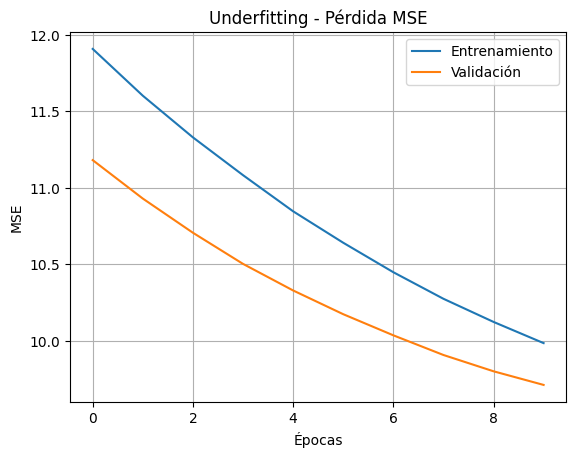

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

# Definimos la red neuronal con pocas neuronas para simular underfitting
modelo_under = models.Sequential([
    Input(shape=(4,)),             # Capa de entrada con 4 características (features)
    layers.Dense(2, activation='relu'),  # Capa oculta con solo 2 neuronas y activación ReLU (poca capacidad)
    layers.Dense(1)                # Capa de salida con 1 neurona para regresión (valor continuo)
])

# Compilamos el modelo con el optimizador Adam y función de pérdida MSE (error cuadrático medio)
modelo_under.compile(optimizer='adam', loss='mse')

# Entrenamos el modelo con pocas épocas para reforzar el underfitting

# X_train, y_train: datos de entrenamiento
# validation_data: datos de prueba para validación durante el entrenamiento
hist_under = modelo_under.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0) # verbose=0 para que no imprima detalles en consola

# Graficamos la evolución de la pérdida (MSE) durante el entrenamiento y validación
plt.plot(hist_under.history['loss'], label='Entrenamiento')
plt.plot(hist_under.history['val_loss'], label='Validación')
plt.title('Underfitting - Pérdida MSE')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## **2.2. Solución Aceptable: modelo balanceado**
Aquí entrenamos una red neuronal con 30 neuronas en la capa oculta y 100 épocas.
Además, incorporamos regularización L2 (weight decay) para reducir el riesgo de overfitting.
Este tipo de configuración suele lograr un buen equilibrio entre complejidad y generalización.

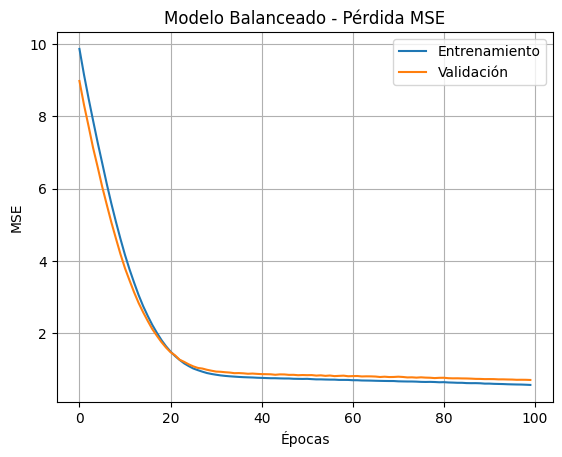

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input, regularizers
import matplotlib.pyplot as plt

# Definimos la red neuronal con suficientes neuronas y regularización
modelo_ok = models.Sequential([
    Input(shape=(4,)),  # 4 features de entrada
    layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Capa oculta con regularización L2
    layers.Dense(1)  # Salida
])

# Compilamos el modelo
modelo_ok.compile(optimizer='adam', loss='mse')

# Entrenamos con 100 épocas
hist_ok = modelo_ok.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Graficamos la pérdida
plt.plot(hist_ok.history['loss'], label='Entrenamiento')
plt.plot(hist_ok.history['val_loss'], label='Validación')
plt.title('Modelo Balanceado - Pérdida MSE')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## **2.3. Overfitting: modelo demasiado complejo**
En este caso entrenamos una red neuronal con 200 neuronas en la capa oculta y 1000 épocas, sin regularización.
Este modelo es excesivamente complejo para el problema, lo que hace que aprenda demasiado bien el conjunto de entrenamiento y genere errores más altos en test.
Este es un caso clásico de overfitting.

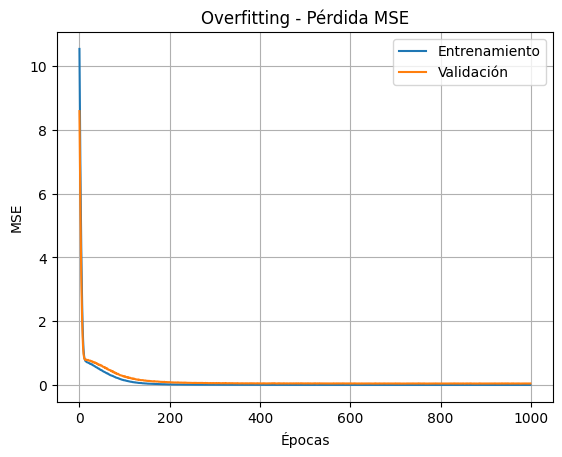

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

# Definimos el modelo con muchas neuronas y sin regularización
modelo_over = models.Sequential([
    Input(shape=(4,)),  # 4 features de entrada
    layers.Dense(200, activation='relu'),  # Capa oculta muy grande
    layers.Dense(1)  # Salida
])

# Compilamos el modelo
modelo_over.compile(optimizer='adam', loss='mse')

# Entrenamos con 1000 épocas
hist_over = modelo_over.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)

# Gráfico de la pérdida
plt.plot(hist_over.history['loss'], label='Entrenamiento')
plt.plot(hist_over.history['val_loss'], label='Validación')
plt.title('Overfitting - Pérdida MSE')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## **Evaluación Comparativa de los Modelos MLP**
Se realiza una evaluación numérica comparativa de los tres modelos entrenados (underfitting, balanceado y overfitting). Calculamos la pérdida (MSE) tanto en los datos de entrenamiento como en los de prueba para cuantificar su desempeño y verificar visualmente lo observado en las gráficas previas.
Esta comparación nos permite confirmar cuál modelo ofrece el mejor equilibrio entre ajuste y generalización al problema.

In [15]:
# Evaluación comparativa final

print("Evaluación Comparativa de los Modelos MLA")

train_loss_under = modelo_under.evaluate(X_train, y_train, verbose=0)
test_loss_under = modelo_under.evaluate(X_test, y_test, verbose=0)

train_loss_ok = modelo_ok.evaluate(X_train, y_train, verbose=0)
test_loss_ok = modelo_ok.evaluate(X_test, y_test, verbose=0)

train_loss_over = modelo_over.evaluate(X_train, y_train, verbose=0)
test_loss_over = modelo_over.evaluate(X_test, y_test, verbose=0)


print(f"\nUNDERFITTING - Pérdida entrenamiento final: {train_loss_under:.2f} __ "
      f"pérdida test final: {test_loss_under:.2f}")

print(f"\nSOLUCIÓN ACEPTABLE - Pérdida entrenamiento final: {train_loss_ok:.2f} __ "
      f"pérdida test final: {test_loss_ok:.2f}")

print(f"\nOVERFITTING - Pérdida entrenamiento final: {train_loss_over:.2f} __ "
      f"pérdida test final: {test_loss_over:.2f}")

Evaluación Comparativa de los Modelos MLA

UNDERFITTING - Pérdida entrenamiento final: 9.92 __ pérdida test final: 9.71

SOLUCIÓN ACEPTABLE - Pérdida entrenamiento final: 0.57 __ pérdida test final: 0.71

OVERFITTING - Pérdida entrenamiento final: 0.00 __ pérdida test final: 0.05


Como se observa, el modelo underfitting no logra ajustar bien los datos, presentando altos errores en entrenamiento y test. El modelo óptimo presenta un buen equilibrio, con errores bajos y similares en ambos conjuntos, indicando buena generalización. Por último, el modelo overfitting muestra un error casi nulo en entrenamiento, pero un error mayor en test, reflejando que sobreajusta los datos de entrenamiento y no generaliza correctamente. Esto confirma la importancia de elegir una arquitectura adecuada para obtener modelos robustos que generalicen bien.

____________________  
# **3. ENTRENAMIENTO DE UNA RED KAN**  
_____________________

En esta sección se entrena una red KAN (K-Approximate Nearest-neighbor) utilizando la librería **pykan**. Se prueban distintas configuraciones para ilustrar los efectos del underfitting, un ajuste adecuado y el overfitting sobre el desempeño del modelo.

Las configuraciones contemplan:  
- **Underfitting:** red con muy baja capacidad (pocas neuronas).  
- **Solución Aceptable:** arquitectura equilibrada con ajuste fino de hiperparámetros.  
- **Overfitting:** red con gran capacidad y entrenamiento prolongado sin regularización.

Se visualizan además las funciones aprendidas por la red en una dimensión proyectada para comparar con los datos reales.
____________________

## **3.1 Underfitting: Red muy simple**
En este caso, entrenamos una red KAN con una arquitectura muy simple: una sola neurona por capa. Esta configuración tiene una capacidad de aproximación limitada, lo que probablemente resultará en un rendimiento deficiente tanto en los conjuntos de entrenamiento como de prueba.

In [9]:
!pip install git+https://github.com/KindXiaoming/pykan.git -q

  Preparing metadata (setup.py) ... done


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.63e+00 | test_loss: 3.92e+00 | reg: 9.02e+00 | : 100%|█| 20/20 [00:10<00:00,  1.92it


saving model version 0.1


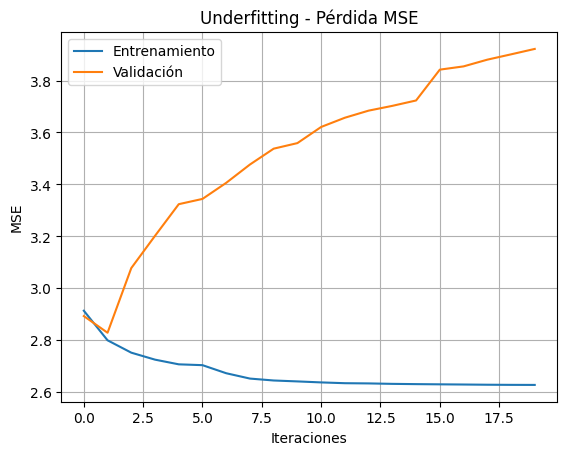

In [10]:
# Instalamos pykan si no está instalado
# !pip install git+https://github.com/KindXiaoming/pykan.git

import torch
from kan import KAN
import matplotlib.pyplot as plt

# Configuramos el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convertimos los datos a tensores de PyTorch y los movemos al dispositivo
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# Creamos el dataset con claves correctas para pykan
dataset_under = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,  # clave correcta
    'test_input': X_test_tensor,
    'test_label': y_test_tensor     # clave correcta
}

# Definimos la red KAN con una sola neurona por capa (underfitting)
model_under = KAN(width=[4, 1, 1], grid=5, k=3, seed=42, device=device)

# Entrenamos el modelo
history_under = model_under.fit(dataset_under, opt="LBFGS", steps=20)

# Graficamos la pérdida
plt.plot(history_under['train_loss'], label='Entrenamiento')
plt.plot(history_under['test_loss'], label='Validación')
plt.title('Underfitting - Pérdida MSE')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## **3.2 Solución Aceptable: Arquitectura Equilibrada y Ajuste Fino**
En esta configuración, utilizamos una red KAN con una arquitectura equilibrada de 5 neuronas en la capa oculta, lo que permite un buen balance entre capacidad de aprendizaje y generalización. Se aumentan las iteraciones de entrenamiento para mejorar la convergencia, y se ajustan hiperparámetros como el tamaño de la grilla (grid) y el parámetro k para un mejor desempeño.

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.87e-02 | test_loss: 4.41e-01 | reg: 2.63e+01 | : 100%|█| 200/200 [01:16<00:00,  2.61

saving model version 0.1


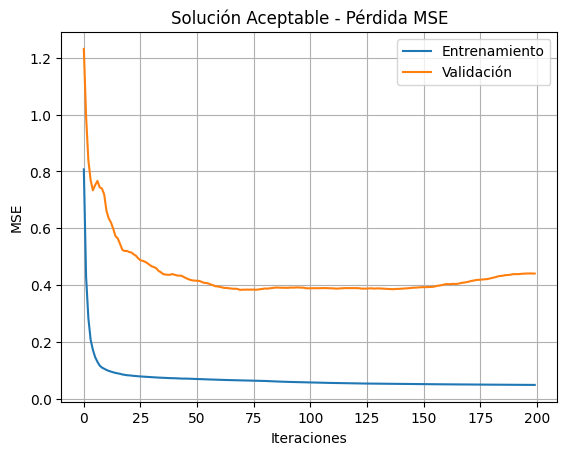

In [11]:
import torch
from kan import KAN
import matplotlib.pyplot as plt

# Configuramos el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset con tensores PyTorch
dataset_balanced = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_test_tensor,
    'test_label': y_test_tensor
}

# Red KAN equilibrada: 4 entradas,5 neuronas, 1 salida
model_balanced = KAN(width=[4, 5, 1], grid=15, k=3, seed=42, device=device)

# Entrenamiento con optimizador LBFGS y 200 pasos
history_balanced = model_balanced.fit(dataset_balanced, opt="LBFGS", steps=200)

# Gráfico de pérdida MSE para entrenamiento y validación
plt.plot(history_balanced['train_loss'], label='Entrenamiento')
plt.plot(history_balanced['test_loss'], label='Validación')
plt.title('Solución Aceptable - Pérdida MSE')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## **3.3 Overfitting: Red Profunda y Entrenamiento Prolongado**
En esta configuración, la red KAN es muy grande (capa oculta con 50 neuronas), y el entrenamiento se realiza durante muchas iteraciones (400 pasos) sin ningún tipo de regularización ni early stopping. Esto causa que el modelo aprenda muy bien los datos de entrenamiento, pero generalice mal en los datos de test, mostrando un claro sobreajuste.

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.86e-06 | test_loss: 4.98e-01 | reg: 7.40e+01 | : 100%|█| 400/400 [08:19<00:00,  1.25


saving model version 0.1


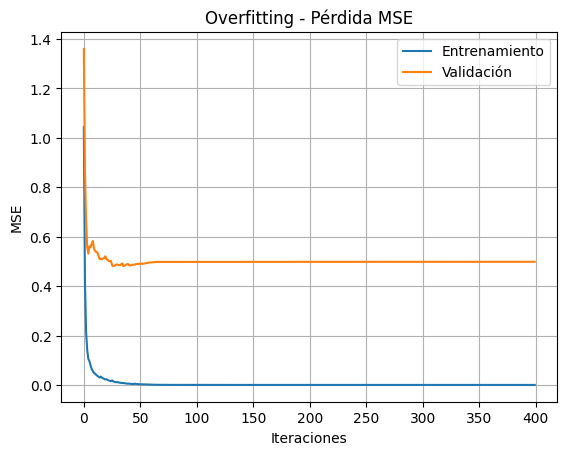

In [12]:
import torch
from kan import KAN
import matplotlib.pyplot as plt

# Configuramos el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset con tensores PyTorch (ya definido)
dataset_overfit = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_test_tensor,
    'test_label': y_test_tensor
}

# Red KAN grande: 4 entradas, capa oculta con 50 neuronas, 1 salida
model_overfit = KAN(width=[4, 50, 1], grid=10, k=5, seed=42, device=device)

# Entrenamiento prolongado (sin early stopping) con 1000 pasos
history_overfit = model_overfit.fit(dataset_overfit, opt="LBFGS", steps=400)

# Graficamos la pérdida MSE para entrenamiento y validación
plt.plot(history_overfit['train_loss'], label='Entrenamiento')
plt.plot(history_overfit['test_loss'], label='Validación')
plt.title('Overfitting - Pérdida MSE')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## **Evaluación Comparativa de los Modelos KAN**

Se evaluaron tres modelos KAN (underfitting, balanceado y overfitting) mediante la pérdida (MSE) en los conjuntos de entrenamiento y prueba. Esto permite medir su desempeño y confirmar cuál modelo logra un mejor equilibrio entre ajuste y generalización, asegurando una adecuada capacidad de aprendizaje sin sobreajuste ni subajuste.

In [17]:
print("Evaluación Comparativa de los Modelos KAN")
print(f"\nUNDERFITTING - Pérdida entrenamiento final: {history_under['train_loss'][-1]:.2f} __ "
      f"pérdida test final: {history_under['test_loss'][-1]:.2f}")

print(f"\nSOLUCIÓN ACEPTABLE - Pérdida entrenamiento final: {history_balanced['train_loss'][-1]:.2f} __ "
      f"pérdida test final: {history_balanced['test_loss'][-1]:.2f}")

print(f"\nOVERFITTING - Pérdida entrenamiento final: {history_overfit['train_loss'][-1]:.2f} __ "
      f"pérdida test final: {history_overfit['test_loss'][-1]:.2f}")

Evaluación Comparativa de los Modelos KAN

UNDERFITTING - Pérdida entrenamiento final: 2.63 __ pérdida test final: 3.92

SOLUCIÓN ACEPTABLE - Pérdida entrenamiento final: 0.05 __ pérdida test final: 0.44

OVERFITTING - Pérdida entrenamiento final: 0.00 __ pérdida test final: 0.50


## **Visualización de la función aprendida por KAN vs. los datos reales (proyección 2D)**
Para facilitar la interpretación del modelo KAN, proyectamos la función aprendida en una dimensión seleccionada (una feature) y mantenemos las demás features constantes en su valor promedio. Esto nos permite graficar cómo el modelo responde al variar esa feature, comparando con los datos reales de test para observar la aproximación de la red.

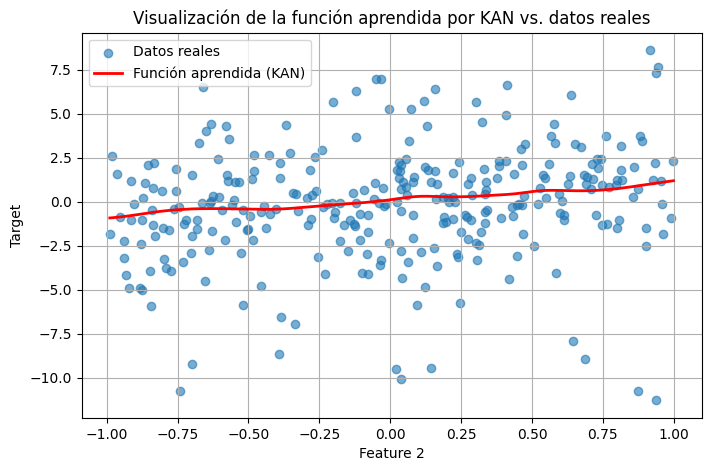

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Elegimos la feature a proyectar
feature_idx = 1

# Creamos un rango de valores para esa feature, cubriendo el rango de datos reales
x_vals = np.linspace(X_test[:, feature_idx].min(), X_test[:, feature_idx].max(), 200)

# Para las otras features mantenemos un valor fijo (promedio de cada columna en el conjunto de test)
fixed_features = X_test.mean(axis=0)

# Construimos el conjunto de inputs variando solo la feature seleccionada
X_proj = np.tile(fixed_features, (len(x_vals), 1))
X_proj[:, feature_idx] = x_vals

# Convertimos a tensor y lo movemos al dispositivo (CPU o GPU)
X_proj_tensor = torch.tensor(X_proj, dtype=torch.float32).to(device)

# Obtenemos la predicción del modelo KAN para los inputs proyectados
with torch.no_grad():
    y_pred_tensor = model_overfit.forward(X_proj_tensor)

# Pasamos la predicción a numpy para graficar
y_pred = y_pred_tensor.cpu().numpy()

# Graficamos los datos reales (scatter) y la función aprendida (línea continua)
plt.figure(figsize=(8,5))
plt.scatter(X_test[:, feature_idx], y_test, label='Datos reales', alpha=0.6)
plt.plot(x_vals, y_pred, color='red', label='Función aprendida (KAN)', linewidth=2)
plt.title('Visualización de la función aprendida por KAN vs. datos reales')
plt.xlabel(f'Feature {feature_idx + 1}')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

## **Evaluación Comparativa de los Modelos KAN**
Se presentan las métricas finales de pérdida para cada configuración entrenada con KAN:

- **Underfitting:** modelo muy simple con baja capacidad, que no ajusta bien los datos.

- **Solución Aceptable:** modelo equilibrado que logra buen ajuste y generalización.

- **Overfitting:** modelo con alta capacidad entrenado muchas iteraciones, que ajusta muy bien entrenamiento pero falla en test.

Los modelos KAN evidencian que la red simple no aprende bien (altas pérdidas), el modelo balanceado logra buen desempeño y generaliza adecuadamente, mientras que la red muy compleja se ajusta demasiado a los datos de entrenamiento, perdiendo precisión en datos nuevos.

_____________
___________
# 4. CONCLUSIONES Y ANÁLISIS


---

## 1. Conclusión y Análisis del Experimento (Notebook)

Los resultados obtenidos muestran diferencias claras en el comportamiento de ambos modelos bajo distintos escenarios:

- **MLP** presenta mayor pérdida en underfitting, pero logra una precisión superior en condiciones de sobreajuste, con una pérdida en test de 0.05 frente a 0.50 del KAN.
- En la solución balanceada, el **KAN** demuestra mejor capacidad de generalización, con pérdida en test de 0.44 comparado con 0.71 del MLP.

Esto indica que el **MLP** es más flexible y potente para modelar funciones complejas, aunque es más propenso a sobreajustar y requiere técnicas de regularización. Por otro lado, el **KAN** ofrece un mejor control del sobreajuste y mayor interpretabilidad, aunque con una precisión máxima limitada.

**Decisión:**  
La elección entre MLP y KAN dependerá de si se prioriza la capacidad predictiva y adaptación (MLP) o la robustez, control del sobreajuste y explicabilidad (KAN).

---

## 2. Comparación General entre MLP y KAN

### ¿Qué son y cómo funcionan?

- **MLP (Perceptrón Multicapa):**  
Red neuronal con múltiples capas y neuronas que ajustan pesos para aprender funciones complejas. Es un modelo muy versátil para tareas como reconocimiento de imágenes o procesamiento de lenguaje natural.

- **KAN (Kolmogorov-Arnold Networks):**  
Modelo que combina funciones base matemáticas conocidas (como gaussianas o polinomios) que se adaptan directamente a regiones específicas de los datos, logrando aproximar funciones complejas con mayor control.

### Interpretabilidad y comportamiento

- **MLP como "caja negra":**  
Debido a la gran cantidad de pesos y capas, es difícil entender cómo cada parámetro afecta la salida. Esto limita la transparencia del modelo, aunque permite gran flexibilidad.

- **KAN más interpretable:**  
Las funciones base actúan como bloques claros y visibles, cada uno asociado a una región de datos. Esto facilita entender cómo contribuye cada parte del modelo a la predicción final.

### ¿Cuándo usar cada modelo?

**KAN** es recomendable cuando se prioriza la interpretabilidad del modelo, se cuenta con pocos datos o se necesita un menor riesgo de sobreajuste. Es ideal en áreas como salud, educación o investigación científica, donde la transparencia y comprensión del modelo son fundamentales.

Por otro lado, **MLP** es adecuado cuando se requiere una alta capacidad de aprendizaje para tareas complejas y se dispone de grandes volúmenes de datos. Es especialmente útil en aplicaciones como reconocimiento de imágenes, procesamiento de lenguaje natural (NLP) y otros problemas que demandan modelar relaciones complejas entre variables.

_________
__________
# **5. REFERENCIAS**
___________
______________

### Herramientas utilizadas

- Python
- Jupyter Notebook
- numpy: manipulación de datos   
- matplotlib: visualización  
- scikit-learn: evaluación y métricas
- tensorflow.keras: implementación del modelo MLP  
- kan: construcción de modelos Kolmogorov–Arnold Networks (KAN)


### Prompts utilizados - ChatGPT

¿Cómo construir un MLP y ajustar su arquitectura para evitar overfitting?

¿Cómo se define e implementa un modelo KAN básico con datos sintéticos?

¿Cuál es la diferencia entre MLP y KAN, y qué ventajas ofrece cada uno?

¿Por qué se dice que el MLP es una "caja negra" y qué rol cumplen las funciones base en un KAN?

¿Cómo interpretar la pérdida de entrenamiento y test para identificar underfitting u overfitting?

¿Cuándo conviene usar un modelo como el MLP y cuándo uno interpretable como el KAN?


### **Material de apoyo:**
- Clases teóricas y prácticas de la materia *Aprendizaje Automático 2 (AA2)*.
- [Redes KAN (Kolmogorov Arnold Networks) – Video explicativo](https://www.youtube.com/watch?v=Jb9wMCPUlnc)

